In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
url = 'https://showkhin.github.io/data/weather_data.csv'
df = pd.read_csv(url)
df

,Year,Month,Day,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
0,1988,1,1,0.0,26.7,12.9,0.0,77.0,1016.9,0.0
1,1989,1,1,0.0,26.4,14.7,1.0,78.0,1016.7,5.0
2,1990,1,1,0.0,23.5,11.4,0.0,68.0,1015.1,4.4
3,1991,1,1,0.0,25.6,15.2,3.0,75.0,1011.9,2.0
4,1992,1,1,0.0,20.5,12.8,4.0,75.0,1019.0,2.0
...,...,...,...,...,...,...,...,...,...,...
10953,2013,12,31,0.0,23.7,11.8,1.0,73.0,1017.2,2.0
10954,2014,12,31,0.0,22.3,14.5,7.0,75.0,1014.7,0.0
10955,2015,12,31,0.0,26.4,15.5,2.0,73.0,1017.5,0.0
10956,2016,12,31,0.0,26.2,15.0,1.0,80.0,1014.6,0.0


In [3]:
date=df.apply(lambda x: datetime.date(int(x['Year']), x['Month'], x['Day']),axis=1)
date = pd.to_datetime(date)
dfm = df.drop(columns=['Day'])
dfm.insert(0, 'Date', date)
dfm=dfm.set_index('Date')
dfm

,Year,Month,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
Date,,,,,,,,,
1988-01-01,1988,1,0.0,26.7,12.9,0.0,77.0,1016.9,0.0
1989-01-01,1989,1,0.0,26.4,14.7,1.0,78.0,1016.7,5.0
1990-01-01,1990,1,0.0,23.5,11.4,0.0,68.0,1015.1,4.4
1991-01-01,1991,1,0.0,25.6,15.2,3.0,75.0,1011.9,2.0
1992-01-01,1992,1,0.0,20.5,12.8,4.0,75.0,1019.0,2.0
...,...,...,...,...,...,...,...,...,...
2013-12-31,2013,12,0.0,23.7,11.8,1.0,73.0,1017.2,2.0
2014-12-31,2014,12,0.0,22.3,14.5,7.0,75.0,1014.7,0.0
2015-12-31,2015,12,0.0,26.4,15.5,2.0,73.0,1017.5,0.0


In [4]:
dfm.dtypes

Year              int64
Month             int64
Rain            float64
Max_T.          float64
Min_T.          float64
Cloud           float64
Releted Hum.    float64
Sea Level P.    float64
Wind             object
dtype: object

In [5]:
cols = ['Wind']
dfm[cols] = dfm[cols].apply(pd.to_numeric, errors='coerce', axis=1)
dfm.dtypes

Year              int64
Month             int64
Rain            float64
Max_T.          float64
Min_T.          float64
Cloud           float64
Releted Hum.    float64
Sea Level P.    float64
Wind            float64
dtype: object

In [6]:
data1=dfm.drop(['Year','Month'],1)
data1.head()

,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
Date,,,,,,,
1988-01-01,0.0,26.7,12.9,0.0,77.0,1016.9,0.0
1989-01-01,0.0,26.4,14.7,1.0,78.0,1016.7,5.0
1990-01-01,0.0,23.5,11.4,0.0,68.0,1015.1,4.4
1991-01-01,0.0,25.6,15.2,3.0,75.0,1011.9,2.0
1992-01-01,0.0,20.5,12.8,4.0,75.0,1019.0,2.0


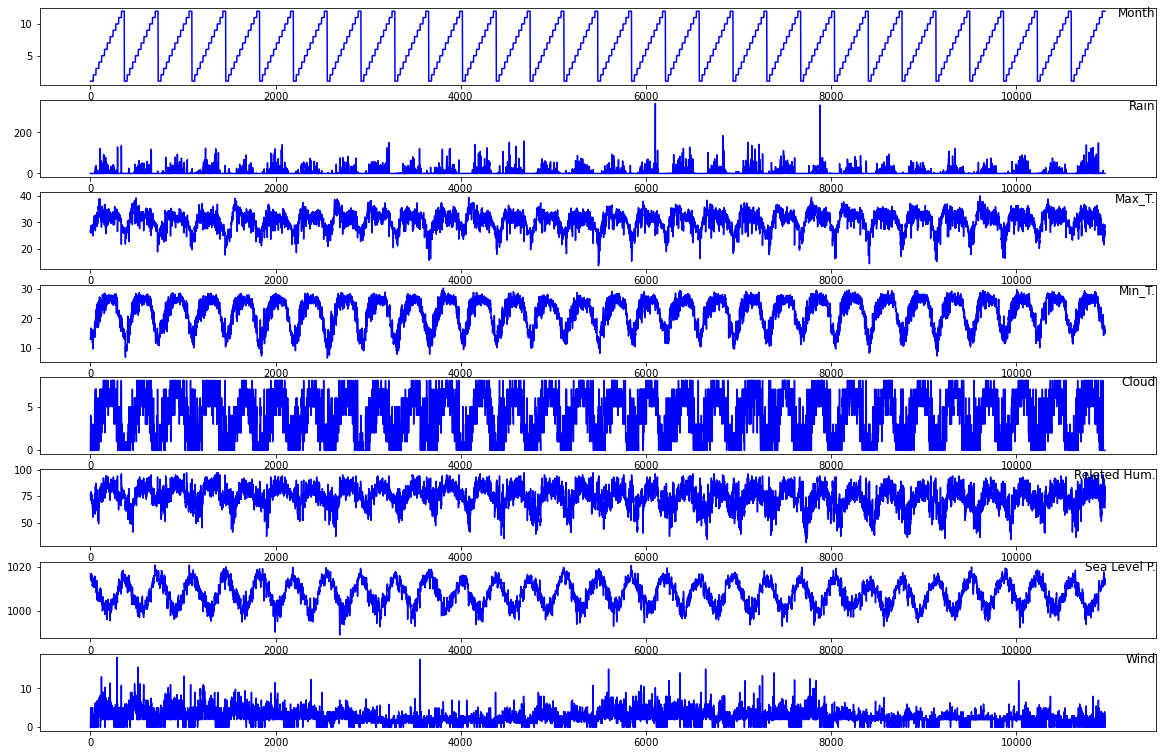

In [7]:

#Its imperative from autocorealtion plots that we dont need each minute data, perhaps we can decide roll up the aggregate
i = 1
# plot each column
plt.figure(figsize=(20, 15))
for counter in range(1,len(dfm.columns)):
    plt.subplot(len(dfm.columns), 1, i)
    plt.plot(dfm.resample('D').mean().values[:, counter], color = 'blue')
    plt.title(dfm.columns[counter], y=0.8, loc='right')
    i = i+1
plt.show()

In [8]:
sns.set(rc={'figure.figsize':(14,4)})
## Use seaborn style defaults and set the default figure size

In [9]:
dfm

,Year,Month,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
Date,,,,,,,,,
1988-01-01,1988,1,0.0,26.7,12.9,0.0,77.0,1016.9,0.0
1989-01-01,1989,1,0.0,26.4,14.7,1.0,78.0,1016.7,5.0
1990-01-01,1990,1,0.0,23.5,11.4,0.0,68.0,1015.1,4.4
1991-01-01,1991,1,0.0,25.6,15.2,3.0,75.0,1011.9,2.0
1992-01-01,1992,1,0.0,20.5,12.8,4.0,75.0,1019.0,2.0
...,...,...,...,...,...,...,...,...,...
2013-12-31,2013,12,0.0,23.7,11.8,1.0,73.0,1017.2,2.0
2014-12-31,2014,12,0.0,22.3,14.5,7.0,75.0,1014.7,0.0
2015-12-31,2015,12,0.0,26.4,15.5,2.0,73.0,1017.5,0.0


<AxesSubplot:xlabel='Date'>

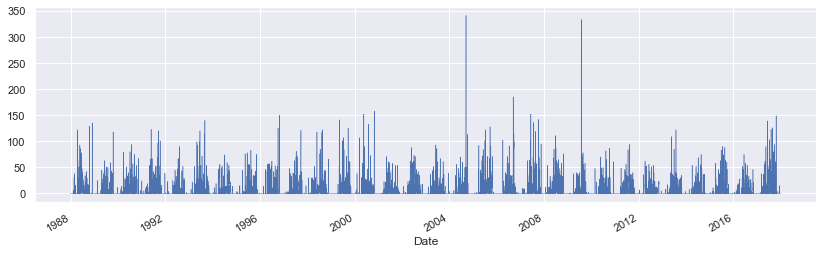

In [10]:
dfm['Rain'].plot(linewidth=0.5)

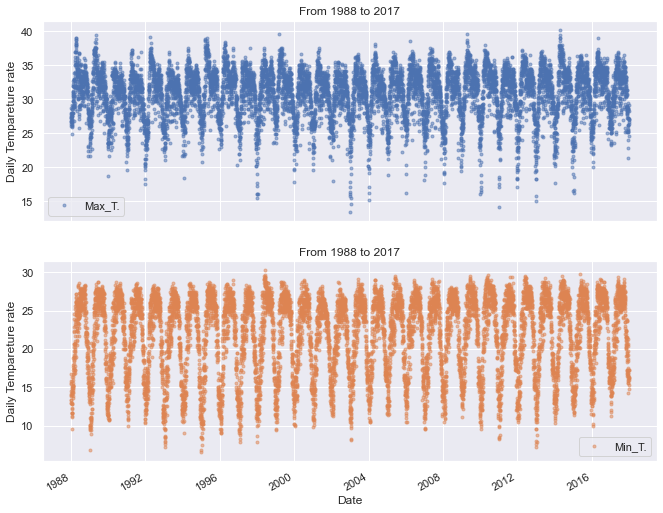

In [11]:
cols_plot = ['Max_T.','Min_T.']
axes = dfm[cols_plot].plot(marker='.',alpha=0.5,linestyle='None',
                           figsize=(11,9),subplots=True)
for ax in axes:
    ax.set_title('From 1988 to 2017')
    ax.set_ylabel('Daily Tempareture rate')

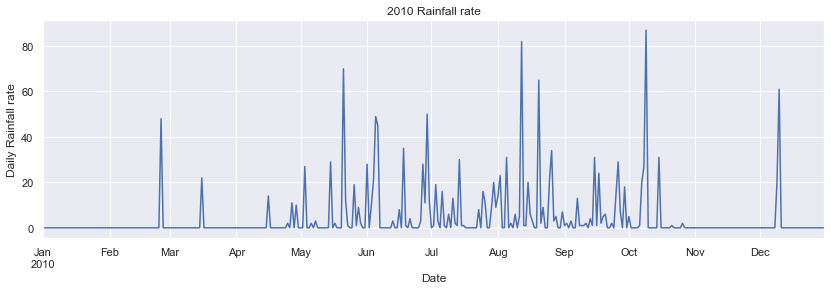

In [12]:
ax = dfm.loc['2010', 'Rain'].plot()
ax.set_title('2010 Rainfall rate')
ax.set_ylabel('Daily Rainfall rate');

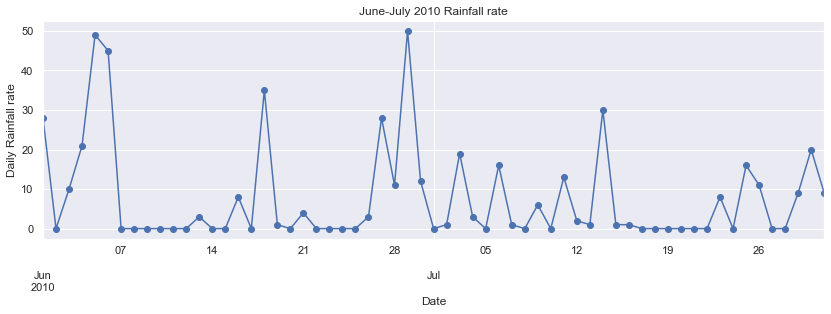

In [13]:
ax = dfm.loc['2010-06':'2010-07', 'Rain'].plot(marker ='o',linestyle='-')
ax.set_title('June-July 2010 Rainfall rate')
ax.set_ylabel('Daily Rainfall rate');

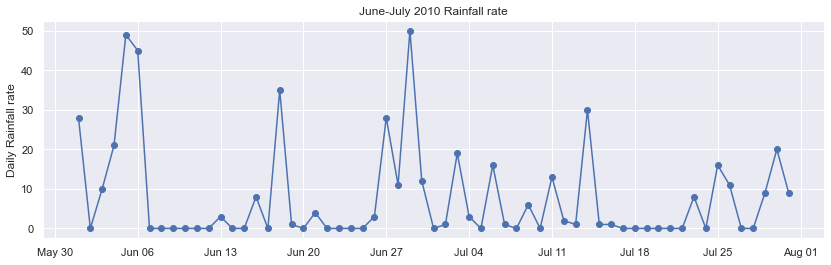

In [14]:
fig,ax = plt.subplots()
ax.plot(dfm.loc['2010-06':'2010-07', 'Rain'],marker ='o',linestyle='-')
ax.set_ylabel('Daily Rainfall rate')
ax.set_title('June-July 2010 Rainfall rate')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [15]:
dfm.dtypes

Year              int64
Month             int64
Rain            float64
Max_T.          float64
Min_T.          float64
Cloud           float64
Releted Hum.    float64
Sea Level P.    float64
Wind            float64
dtype: object

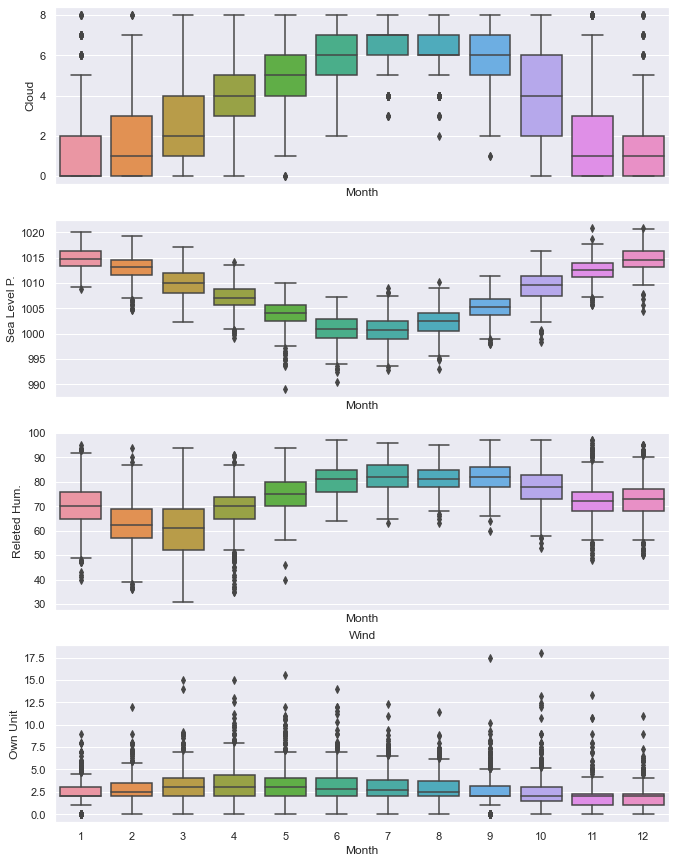

In [16]:
fig, axes = plt.subplots(4,1, figsize= (11,15),sharex=True)
for name, ax in zip(['Cloud','Sea Level P.','Releted Hum.','Wind'],axes):
    sns.boxplot(data=dfm, x='Month', y=name, ax=ax)
ax.set_ylabel('Own Unit')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottm subplot
if ax != axes[-1]:
    ax.set_xlabel('')

These box plots confirm that
1.There are less cloud in winter and much cloud in summer
2.The Sea Level P. rises high in winter and lows in summer
3.Releted Hum. stays average in winter and rises in summer
4.Wind stays average through out the year though rises in summer

In [17]:
data_columns = ['Rain' ,'Max_T.','Min_T.','Cloud','Releted Hum.','Sea Level P.','Wind']
dfm_weekly_mean = dfm[data_columns].resample('W').mean()

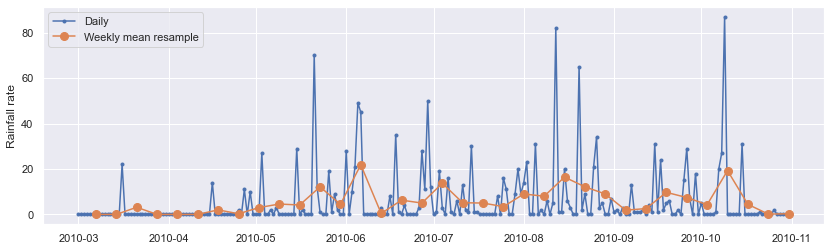

In [18]:
#Start and end of the date range to extract
start, end ='2010-03','2010-10'
#Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(dfm.loc[start:end,'Rain'],marker='.',linestyle='-',label='Daily')
ax.plot(dfm_weekly_mean.loc[start:end,'Rain'],marker='o',markersize=8,
       linestyle='-',label='Weekly mean resample')
ax.set_ylabel('Rainfall rate')
ax.legend()

shows the daily and weekly resampled rainfall for '2010-03','2010-10' time

In [19]:
# Compute the monthly sums
dfm_monthly = dfm[data_columns].resample('M').sum(min_count=28)
dfm_monthly.head(3)

,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
Date,,,,,,,
1988-01-31,0.0,842.6,421.6,32.0,2197.0,31452.2,59.0
1988-02-29,44.0,873.2,473.7,51.0,1953.0,29357.9,65.3
1988-03-31,74.0,1010.5,640.9,82.0,2127.0,31265.3,106.7


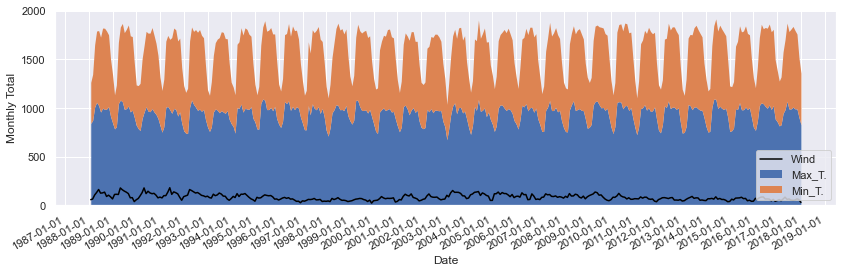

In [20]:
fig, ax = plt.subplots()
ax.plot(dfm_monthly['Wind'], color='black', label='Wind')
dfm_monthly[['Max_T.', 'Min_T.']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total');

<AxesSubplot:xlabel='Cloud', ylabel='count'>

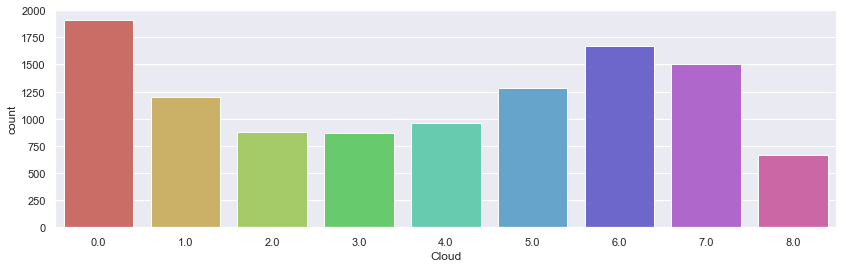

In [21]:
##Making sure cloud is a binary variable 
sns.countplot(x='Cloud',data=dfm,palette='hls')

In [22]:
dfm.isnull().sum()

Year            0
Month           0
Rain            0
Max_T.          0
Min_T.          0
Cloud           0
Releted Hum.    0
Sea Level P.    0
Wind            1
dtype: int64

In [23]:
round(100*(df.isnull().sum()/len(df.index)),2) #This shows the percentage of missing value per column and per day


Year            0.0
Month           0.0
Day             0.0
Rain            0.0
Max_T.          0.0
Min_T.          0.0
Cloud           0.0
Releted Hum.    0.0
Sea Level P.    0.0
Wind            0.0
dtype: float64

In [24]:
dfm["Wind"].fillna( method ='ffill', limit = 1, inplace = True) 
  

In [25]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10958 entries, 1988-01-01 to 2017-12-31
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          10958 non-null  int64  
 1   Month         10958 non-null  int64  
 2   Rain          10958 non-null  float64
 3   Max_T.        10958 non-null  float64
 4   Min_T.        10958 non-null  float64
 5   Cloud         10958 non-null  float64
 6   Releted Hum.  10958 non-null  float64
 7   Sea Level P.  10958 non-null  float64
 8   Wind          10958 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.1 MB


In [26]:
## Reseting indexing
dfm.reset_index(drop=True,inplace=True)
dfm

,Year,Month,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
0,1988,1,0.0,26.7,12.9,0.0,77.0,1016.9,0.0
1,1989,1,0.0,26.4,14.7,1.0,78.0,1016.7,5.0
2,1990,1,0.0,23.5,11.4,0.0,68.0,1015.1,4.4
3,1991,1,0.0,25.6,15.2,3.0,75.0,1011.9,2.0
4,1992,1,0.0,20.5,12.8,4.0,75.0,1019.0,2.0
...,...,...,...,...,...,...,...,...,...
10953,2013,12,0.0,23.7,11.8,1.0,73.0,1017.2,2.0
10954,2014,12,0.0,22.3,14.5,7.0,75.0,1014.7,0.0
10955,2015,12,0.0,26.4,15.5,2.0,73.0,1017.5,0.0
10956,2016,12,0.0,26.2,15.0,1.0,80.0,1014.6,0.0


## Checking if the data have any missing value

In [27]:
##Dropping usless columns
data=dfm.drop(['Year','Month'],1)
data.head()

,Rain,Max_T.,Min_T.,Cloud,Releted Hum.,Sea Level P.,Wind
0,0.0,26.7,12.9,0.0,77.0,1016.9,0.0
1,0.0,26.4,14.7,1.0,78.0,1016.7,5.0
2,0.0,23.5,11.4,0.0,68.0,1015.1,4.4
3,0.0,25.6,15.2,3.0,75.0,1011.9,2.0
4,0.0,20.5,12.8,4.0,75.0,1019.0,2.0


<AxesSubplot:>

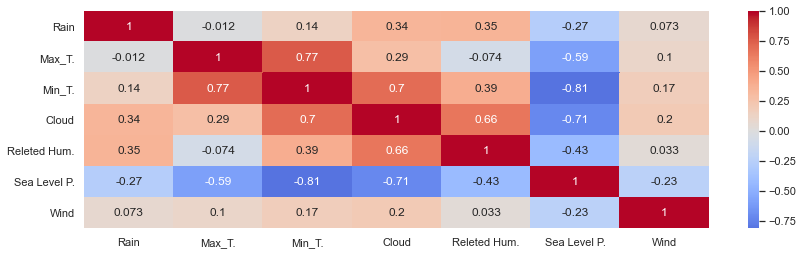

In [28]:
sns.heatmap(data.corr(),center=0,cmap='coolwarm',annot = True)

In [29]:
data["Wind"].fillna( method ='ffill', limit = 1, inplace = True) 
  

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10958 entries, 0 to 10957
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rain          10958 non-null  float64
 1   Max_T.        10958 non-null  float64
 2   Min_T.        10958 non-null  float64
 3   Cloud         10958 non-null  float64
 4   Releted Hum.  10958 non-null  float64
 5   Sea Level P.  10958 non-null  float64
 6   Wind          10958 non-null  float64
dtypes: float64(7)
memory usage: 599.4 KB


In [31]:
## 'Sea Level P.','Wind' are not independent
data=data.drop(['Wind','Rain'],1)

In [32]:
##Bringing cloud to the first index
first =data['Cloud']
data.drop(labels=['Cloud'],axis=1,inplace=True)
data.insert(0,'Cloud',first)
data

,Cloud,Max_T.,Min_T.,Releted Hum.,Sea Level P.
0,0.0,26.7,12.9,77.0,1016.9
1,1.0,26.4,14.7,78.0,1016.7
2,0.0,23.5,11.4,68.0,1015.1
3,3.0,25.6,15.2,75.0,1011.9
4,4.0,20.5,12.8,75.0,1019.0
...,...,...,...,...,...
10953,1.0,23.7,11.8,73.0,1017.2
10954,7.0,22.3,14.5,75.0,1014.7
10955,2.0,26.4,15.5,73.0,1017.5
10956,1.0,26.2,15.0,80.0,1014.6


In [33]:
X=data.iloc[:,1:5]
y=data.iloc[:,0]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state=25)

In [35]:
LogReg = LogisticRegression(max_iter=10958 )
LogReg.fit(X_train,y_train)

LogisticRegression(max_iter=10958)

In [36]:
y_pred = LogReg.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[484,  96,   1,  10,   1,   4,   2,   1,   3],
       [202,  78,   0,  37,   5,  19,  14,   1,   1],
       [ 97,  63,   0,  47,   9,  33,  36,   0,   0],
       [ 63,  53,   0,  29,   8,  47,  40,   5,   0],
       [ 40,  45,   0,  21,  11,  49,  99,  21,   2],
       [ 13,  33,   0,  19,   9,  72, 156,  62,   2],
       [  8,  15,   0,  11,   7,  43, 238, 157,  16],
       [  5,   3,   0,   7,   5,   9, 133, 234,  56],
       [  1,   0,   0,   0,   0,   1,   9,  58, 129]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred ,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

         0.0       0.53      0.80      0.64       602
         1.0       0.20      0.22      0.21       357
         2.0       0.00      0.00      0.00       285
         3.0       0.16      0.12      0.14       245
         4.0       0.20      0.04      0.06       288
         5.0       0.26      0.20      0.22       366
         6.0       0.33      0.48      0.39       495
         7.0       0.43      0.52      0.47       452
         8.0       0.62      0.65      0.63       198

    accuracy                           0.39      3288
   macro avg       0.30      0.34      0.31      3288
weighted avg       0.32      0.39      0.34      3288



# Logistic Regration gave accuracy of : 0.36

# LSTM Algorithm

In [39]:
from numpy import loadtxt 
import sys
from scipy.stats import randint
from sklearn.metrics import mean_squared_error,r2_score
## Deep-learing:

from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from tensorflow.keras.layers import LSTM

from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k

ModuleNotFoundError: No module named 'keras'

data=data.drop(['Sea Level P.'],1)

data

# split into train and test sets
X=data.iloc[:,1:6]
y=data.iloc[:,0]
# split into input and outputs
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = .3, random_state=25)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.values.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.values.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

train_X.shape

model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=20, validation_data=(test_X, test_y), verbose=1, shuffle=False)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X, verbose=0)

rmse = np.sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(200)]
plt.plot(aa, test_y[:200], marker='.', label="actual")
plt.plot(aa, yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time', size=15)
plt.legend(fontsize=13)
plt.show()

## LSTM gave RMSE of :1.395

## Applying KNN

In [ ]:
from sklearn.metrics import confusion_matrix

data=data.drop(['Sea Level P.'],1)

X=data.iloc[:,1:6] 
y=data.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state=25)


data

# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
#### for k or n_neighbors=5 accuracy 0.3515****

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print (accuracy )

# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
cm

print("Accuracy:",metrics.accuracy_score(y_test, knn_predictions))

### KNN gave accuracy of 0.3610097

# Decision Tree

X=data.iloc[:,1:7]
y=data.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state=25)


# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
cm

print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

# Decision tree gave Accuracy: 0.3290754***